In [4]:
import os
import json

import numpy as np 

import matplotlib as mpl
import matplotlib.pyplot as plt
# import scienceplots
# plt.style.use(['science', 'grid'])
# mpl.rcParams["font.size"] = "16"

In [5]:
with open('./data/evaluation.json', 'r') as f:
    results = json.loads(f.read())
    
models = results.keys()

In [6]:
models

dict_keys(['default_10_64', 'default_10_48', 'default_10_32', 'default_10_24', 'random_10_64', 'random_10_48', 'random_10_32', 'random_10_24'])

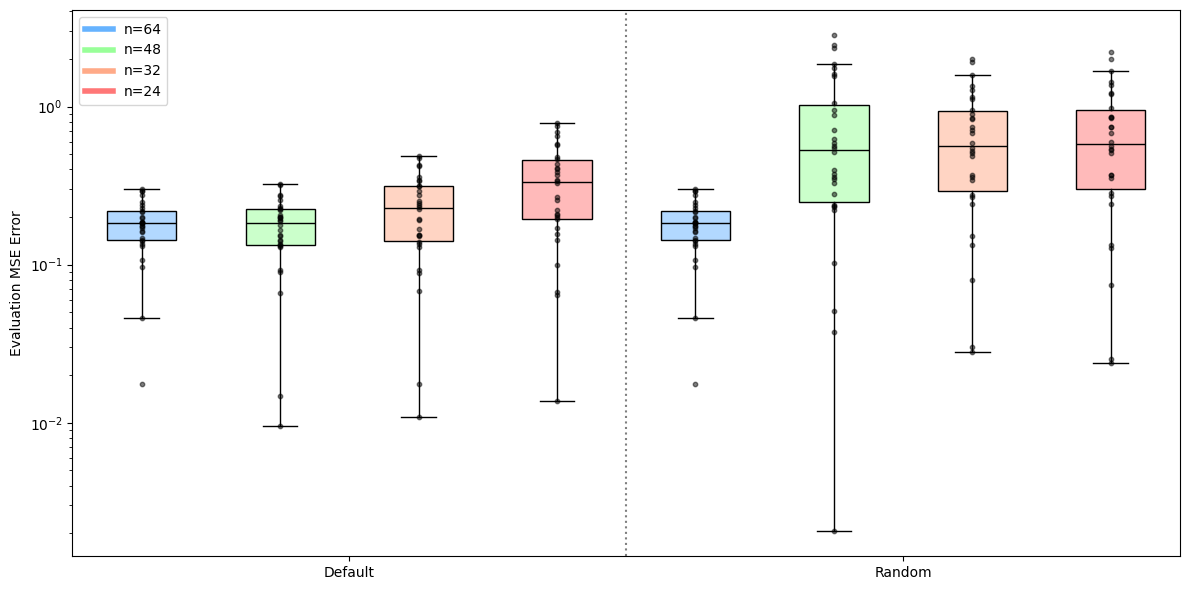

In [14]:
# Prepare data for boxplot
boxplot_data = []
labels = []

models = ['default', 'random']
ns = [64, 48, 32, 24]

for model in models:
    for n in ns:
        key = f"{model}_10_{n}"
        boxplot_data.append(results[key])
        labels.append(key)

# Create the boxplot
plt.figure(figsize=(12, 6))
box = plt.boxplot(boxplot_data, patch_artist=True, notch=False, vert=True, zorder=1, showfliers=False)

# Define colors for the boxplots
colors = ['#FF7777', '#FFAA88', '#99FF99', '#66B3FF'][::-1]
for i, patch in enumerate(box['boxes']):
    model_index = i // len(ns)  # Determine the model index
    # patch.set_alpha(0.5)
    patch.set_edgecolor('black')
    patch.set_facecolor(colors[i % len(colors)])  # Set color based on hyperparameter
    
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.5))
    
    data = boxplot_data[i]
    y = np.random.normal(i + 1, 0.0, size=len(data))
    plt.scatter(y, data, alpha = 0.5, color = 'black', s = 10, zorder = 2)
    
for median in box['medians']:
    median.set_color('black')

# Adding legend
handles = [plt.Line2D([0], [0], color=colors[i], lw=4) for i in range(len(ns))]
labels_legend = [f'n={n}' for n in ns]
plt.legend(handles, labels_legend, loc='upper left', ncol=1)

# Set x-ticks and labels
plt.xticks([2.5, 6.5], ['Default', 'Random'], rotation = 0)
plt.ylabel('Evaluation MSE Error')
plt.grid(False, axis='x')

plt.axvline(4.5, 0, alpha = 0.5, color = 'black', linestyle = ':')

plt.yscale('log')

# Show the plot
plt.tight_layout()
plt.savefig('./performance 1.svg')
plt.show()

In [15]:
def load_data(run_name):
    with open(f'./data/{run_name}.json', 'r') as file:
        result = json.loads(file.read())
    return result

def get_plotting_data(key, *names):
    result = []
    for name in names:
        result.append(load_data(name)[key])
    result = np.array(result)
    
    mean = result.mean(axis=0)
    var = result.std(axis=0)
    
    return mean, var

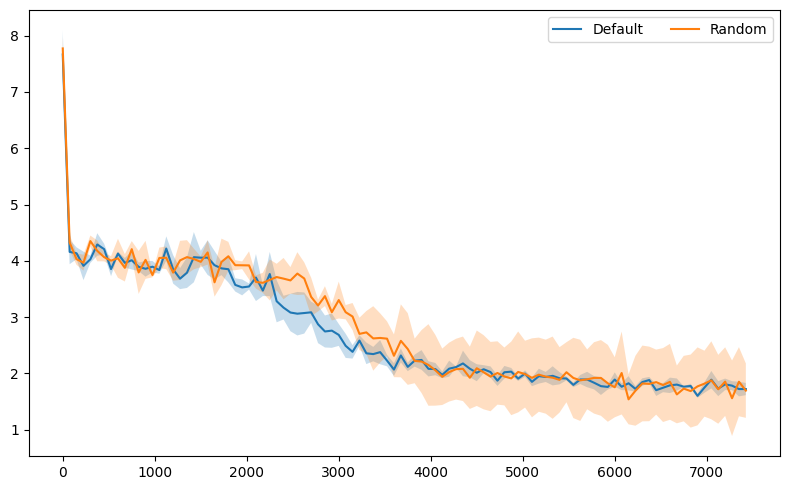

In [18]:
fig = plt.figure(figsize=(8, 5))

x = np.arange(0, 7500, 75)

groups = []
for model in models:
    for n in ns:
        group = []
        for seed in [42, 451, 1984]:
            group.append(f'{model}_10_{n}_{seed}')
    groups.append(group)

for group, model in zip(groups, ['Default', 'Random']):
    mean, var = get_plotting_data('loss', *group)
    mean = mean[::75]
    var = var[::75]
    plt.plot(x, mean, label = model, linewidth = 1.5)
    plt.fill_between(x, mean + var, mean - var, alpha = 0.25, linewidth = 0)

plt.legend(ncols = 2)
plt.tight_layout()
plt.savefig('./loss comparison.svg')
plt.show()

In [ ]:
def load_data(run_name):
    with open(f'./data/{run_name}.json', 'r') as file:
        result = json.loads(file.read())
    return result

def get_plotting_data(key, *names):
    result = []
    for name in names:
        result.append(load_data(name)[key])
    result = np.array(result)
    
    mean = result.mean(axis=0)
    var = result.std(axis=0)
    
    return mean, var

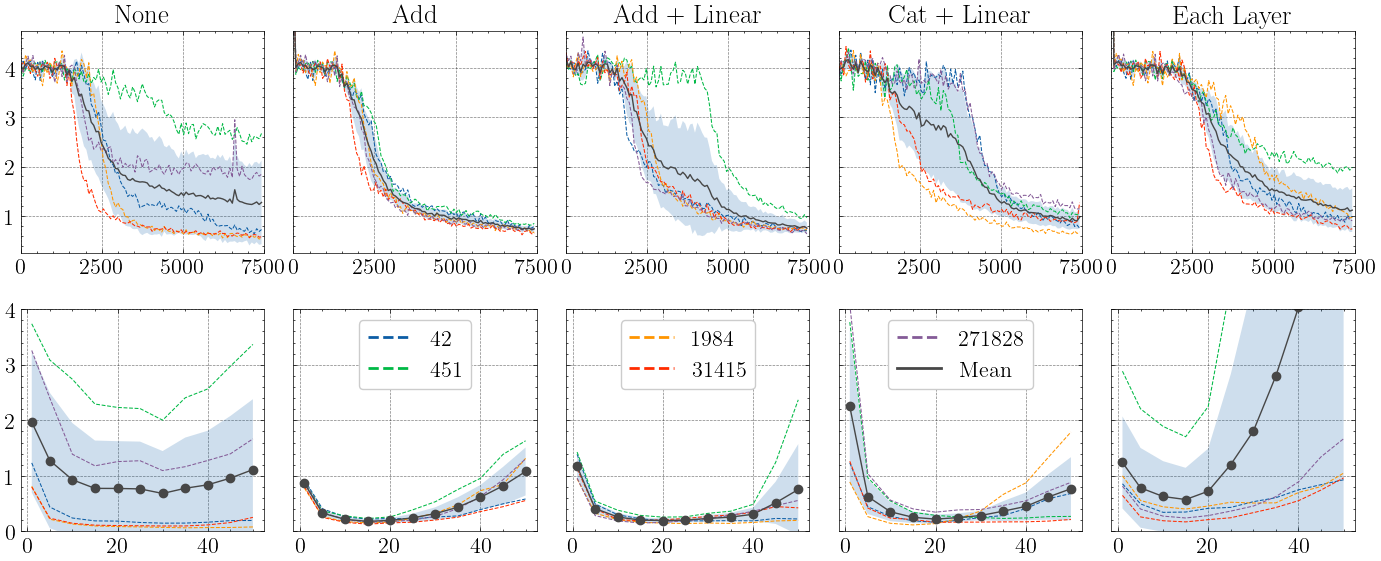

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(14, 6), sharey='row')

x = np.arange(0, 7500, 75)
seeds = [42, 451, 1984, 31415, 271828]
names = ['none', 'add', 'linear_add', 'linear_cat', 'each_layer']
bs = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for i, name in enumerate(names):
    for seed in seeds:
        data = load_data(f'{name}_10_{seed}')
        losses = data['loss'][::75]
        extrap = data['extr']
        axs[0][i].plot(x, losses, alpha = 1, linewidth=0.75, label = seed, linestyle='--')
        axs[1][i].plot(bs, extrap, alpha = 1, linewidth=0.75, label = seed, linestyle='--')
        
    mean, var = get_plotting_data('loss', *[f'{name}_10_{seed}' for seed in seeds])
    mean, var = mean[::75], var[::75]
    axs[0][i].plot(x, mean, label = 'Mean')
    axs[0][i].fill_between(x, mean + var, mean - var, alpha = 0.2, linewidth = 0)
    
    mean, var = get_plotting_data('extr', *[f'{name}_10_{seed}' for seed in seeds])
    axs[1][i].plot(bs, mean, label = 'Mean', marker = 'o')
    
    upp = mean + var
    low = mean - var
    axs[1][i].fill_between(bs, upp, low, alpha = 0.2, linewidth = 0)

colors = [axs[0][0].get_lines()[i].get_color() for i in range(6)]

handles = [plt.Line2D([0], [0], color=colors[i], linestyle='--', lw=2) for i in range(5)]
handles += [plt.Line2D([0], [0], color=colors[-1], lw=2)]

labels_legend = seeds + ['Mean']
axs[1][1].legend(handles[:2], labels_legend[:2], ncols=1, loc='upper center')
axs[1][2].legend(handles[2:4], labels_legend[2:4], ncols=1, loc='upper center')
axs[1][3].legend(handles[4:], labels_legend[4:], ncols=1, loc='upper center')

axs[0][0].title.set_text('None')
axs[0][1].title.set_text('Add')
axs[0][2].title.set_text('Add + Linear')
axs[0][3].title.set_text('Cat + Linear')
axs[0][4].title.set_text('Each Layer')

for i in range(5):
    axs[0][i].set_xlim(left=0, right=7500)
    axs[0][i].set_ylim(bottom = 0.25, top=4.75)
    axs[1][i].set_ylim(bottom = 0, top = 4)

plt.tight_layout()
plt.savefig('./comparison.svg')
plt.show()

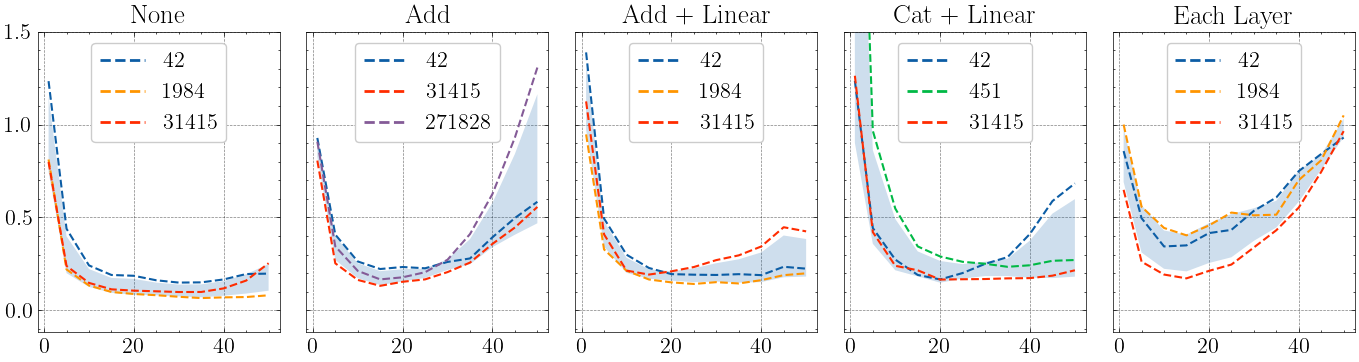

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(14, 4), sharey='row')

fancy = {
    'none': [0, 2, 3],
    'add': [0, 3, 4],
    'linear_add': [0, 2, 3],
    'linear_cat': [0, 1, 3],
    'each_layer': [0, 2, 3]
}
for i, (name, indices) in enumerate(fancy.items()):
    for idx in indices:
        data = load_data(f'{name}_10_{seeds[idx]}')['extr']
        axs[i].plot(bs, data, alpha = 1, linewidth=1.5, label = seed, linestyle='--', color = colors[idx])
        
    mean, var = get_plotting_data('extr', *[f'{name}_10_{seeds[idx]}' for idx in indices])
    upp = mean + var
    low = mean - var
    # axs[i].plot(bs, mean, label = 'Mean', marker = 'o', color = colors[-1])
    axs[i].fill_between(bs, upp, low, alpha = 0.2, linewidth = 0)
    
handles = [plt.Line2D([0], [0], color=colors[i], linestyle='--', lw=2) for i in range(5)]

labels_legend = seeds + ['Mean']

for k, des_seeds in enumerate(fancy.values()):
    axs[k].legend([handles[i] for i in des_seeds], [labels_legend[i] for i in des_seeds], ncols=1, loc='upper center')

axs[0].title.set_text('None')
axs[1].title.set_text('Add')
axs[2].title.set_text('Add + Linear')
axs[3].title.set_text('Cat + Linear')
axs[4].title.set_text('Each Layer')

for i in range(5):
    # axs[i].set_yscale('log')
    axs[i].set_ylim(top = 1.5)

plt.tight_layout()
plt.savefig('./comparison 2.svg')
plt.show()